In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import scale
from collections import Counter

In [2]:
# Function to return the list of distances of the test records from train records
def distNeighbours(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        eDistance=0
        for j in range(len(X_train.columns)):   
                eDistance+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        distance.append((eDistance,i,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance
# Predict the output of the categorical variables based on K nearest neighbours 
# Output is the most frequent class among K nearest neighbours

In [3]:
def predictOutputNumeric(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        mean=0
        for j in i:
            mean+=j[-1]
        mean=mean/K
        responses.append(mean)
    return responses
# Accuarcy of the categorical predictions 
# Accuarcy of the numerical predictions
def getAccuracyNumeric(actual,predicted):
    error=0
    for i in range(len(predicted)):
        error+=pow((actual[i]-predicted[i]),2)
    error=error/len(predicted)-1
    return 100-error

In [4]:
df=pd.read_csv('/content/scaled_preprocessed_Original.csv')
df.head()

,Unnamed: 0,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,big_club,new_signing,market_value
0,0,0.857143,1.000000,0.474502,0.272727,0.313830,0.827160,0.333333,1.0,0.0,7.0
1,1,0.523810,0.000000,0.743159,0.636364,0.079787,0.753086,0.000000,1.0,0.0,20.0
2,2,0.666667,0.666667,0.282649,0.363636,0.037234,0.746914,0.333333,1.0,0.0,22.0
3,3,0.238095,0.666667,0.519900,0.363636,0.728723,0.734568,0.333333,1.0,0.0,30.0
4,4,0.619048,0.000000,0.692475,0.818182,0.132979,0.716049,0.333333,1.0,0.0,22.0


In [5]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,big_club,new_signing,market_value
0,0.857143,1.000000,0.474502,0.272727,0.313830,0.827160,0.333333,1.0,0.0,7.0
1,0.523810,0.000000,0.743159,0.636364,0.079787,0.753086,0.000000,1.0,0.0,20.0
2,0.666667,0.666667,0.282649,0.363636,0.037234,0.746914,0.333333,1.0,0.0,22.0
3,0.238095,0.666667,0.519900,0.363636,0.728723,0.734568,0.333333,1.0,0.0,30.0
4,0.619048,0.000000,0.692475,0.818182,0.132979,0.716049,0.333333,1.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...
424,0.190476,0.333333,0.088619,0.090909,0.021277,0.234568,0.333333,0.0,1.0,5.0
425,0.285714,0.666667,0.060945,0.090909,0.010638,0.209877,1.000000,0.0,1.0,7.0
426,0.285714,0.666667,0.060634,0.090909,0.015957,0.179012,0.000000,0.0,0.0,4.5
427,0.190476,0.000000,0.127177,0.090909,0.313830,0.098765,0.000000,0.0,1.0,1.0


In [6]:
# Specifying the X and Y
X_train=df.iloc[:,:-1]
Y_train=df.market_value

In [7]:
X_train

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,big_club,new_signing
0,0.857143,1.000000,0.474502,0.272727,0.313830,0.827160,0.333333,1.0,0.0
1,0.523810,0.000000,0.743159,0.636364,0.079787,0.753086,0.000000,1.0,0.0
2,0.666667,0.666667,0.282649,0.363636,0.037234,0.746914,0.333333,1.0,0.0
3,0.238095,0.666667,0.519900,0.363636,0.728723,0.734568,0.333333,1.0,0.0
4,0.619048,0.000000,0.692475,0.818182,0.132979,0.716049,0.333333,1.0,0.0
...,...,...,...,...,...,...,...,...,...
424,0.190476,0.333333,0.088619,0.090909,0.021277,0.234568,0.333333,0.0,1.0
425,0.285714,0.666667,0.060945,0.090909,0.010638,0.209877,1.000000,0.0,1.0
426,0.285714,0.666667,0.060634,0.090909,0.015957,0.179012,0.000000,0.0,0.0
427,0.190476,0.000000,0.127177,0.090909,0.313830,0.098765,0.000000,0.0,1.0


In [8]:
# Splitting data into 70:30 train:test ratio
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=33)

In [9]:
X_train

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,big_club,new_signing
95,0.190476,0.666667,0.175062,0.181818,0.005319,0.018519,0.666667,1.0,0.0
337,0.809524,0.333333,0.066853,0.090909,0.005319,0.197531,0.000000,0.0,0.0
149,0.523810,0.666667,0.025187,0.090909,0.037234,0.000000,0.333333,0.0,0.0
15,0.714286,0.333333,0.292289,0.545455,0.005319,0.234568,0.333333,1.0,0.0
305,0.809524,1.000000,0.148321,0.090909,0.063830,0.654321,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...
146,0.190476,1.000000,0.010261,0.000000,0.127660,0.000000,0.000000,0.0,0.0
66,0.619048,0.000000,0.077736,0.181818,0.021277,0.000000,1.000000,0.0,0.0
216,0.190476,0.333333,0.190299,0.090909,0.010638,0.024691,0.333333,1.0,0.0
391,0.428571,0.000000,0.140236,0.363636,0.297872,0.709877,0.333333,0.0,1.0


In [10]:
# Changing the index of the records to sequential
X_train.index=range(len(X_train))
Y_train.index=range(len(X_train))
X_test.index=range(len(X_test))
Y_test.index=range(len(Y_test))

In [11]:
# Predict GPA
output=predictOutputNumeric(X_train,Y_train,X_test,3)
print('Accuracy from the code: {:^0.2f}'.format(getAccuracyNumeric(Y_test,output),2))

Accuracy from the code: 65.19


In [12]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7.727143088495095
RMSE value for k=  2 is: 6.846167164549902
RMSE value for k=  3 is: 6.159481287656356
RMSE value for k=  4 is: 6.097165833528754
RMSE value for k=  5 is: 6.0288598559587285
RMSE value for k=  6 is: 6.036166345943433
RMSE value for k=  7 is: 6.064774511473595
RMSE value for k=  8 is: 6.021642370739504
RMSE value for k=  9 is: 6.0903584283849534
RMSE value for k=  10 is: 6.033494108954669
RMSE value for k=  11 is: 5.959893409899571
RMSE value for k=  12 is: 5.919465584746723
RMSE value for k=  13 is: 5.972902070908488
RMSE value for k=  14 is: 5.919846479813959
RMSE value for k=  15 is: 6.03953281928991
RMSE value for k=  16 is: 6.016201132684941
RMSE value for k=  17 is: 6.043719258430112
RMSE value for k=  18 is: 6.050066887876899
RMSE value for k=  19 is: 6.017370605742183
RMSE value for k=  20 is: 5.996424043389488
RMSE value for k=  21 is: 5.927778028599169
RMSE value for k=  22 is: 5.96645691971131
RMSE value for k=  23 is: 5.9775821044334

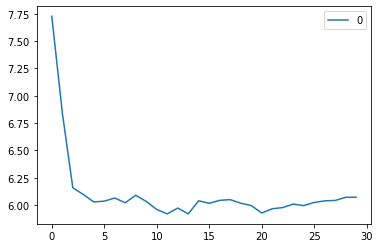

In [13]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [14]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)

model.fit(X_train, Y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  30 is: 6.0288598559587285


In [15]:
print ('R^2 score on training set', model.score(X_train,Y_train))
print ('R^2 score on test set', model.score(X_test,Y_test))

R^2 score on training set 0.7524857675580536
R^2 score on test set 0.4762439490981215
